In [ ]:
# downloada dataset
#!/bin/bash
!kaggle datasets download anisaagungisa/kematangan-buah-pisang

Dataset URL: https://www.kaggle.com/datasets/anisaagungisa/kematangan-buah-pisang
License(s): unknown
kematangan-buah-pisang.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# memuat modul
import os
import cv2
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# ekstrak file zip
def extract_zip(zip_file_path, extract_to):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"File ZIP diekstrak ke: {extract_to}")


In [ ]:
# membaca dataset dan melakukan preprocessing
def load_data(base_dir):
    images = []
    labels = []
    classes = ['freshbanana', 'rottenbanana']

    for label in classes:
        class_dir = os.path.join(base_dir,'Train', label)
        for filename in os.listdir(class_dir):
            img_path = os.path.join(class_dir, filename)
            img = cv2.imread(img_path) #membaca gambar
            img = cv2.resize(img, (150, 150))  # Ukuran yang konsisten
            images.append(img)
            labels.append(classes.index(label))

    images = np.array(images)
    labels = np.array(labels)

    # Normalisasi
    images = images / 255.0
    return images, labels

In [ ]:
# mengubah data yang sebelumnya matriks menjadi vektor (flatten)
def flatten_images(images):
    return images.reshape(images.shape[0], -1)  # Flatten the images

In [ ]:
# memuat mode dan melatih modelnya
def train_svm(X_train, y_train):
    model = svm.SVC(kernel='linear')
    model.fit(X_train, y_train) # melatih model
    return model

In [ ]:
# melakukan evaluasi model dan menampilkan plot confusion matriks
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test))
    plt.yticks(tick_marks, np.unique(y_test))

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

File ZIP diekstrak ke: dataset
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       324
           1       0.99      0.98      0.99       437

    accuracy                           0.99       761
   macro avg       0.99      0.99      0.99       761
weighted avg       0.99      0.99      0.99       761



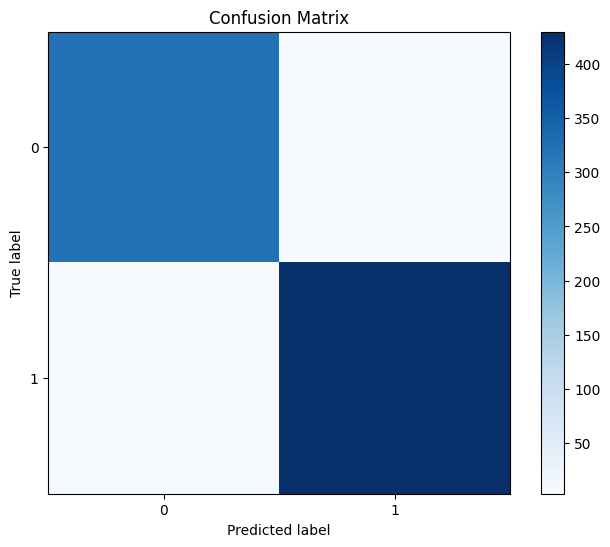

In [ ]:
# menjalankan fungsi utama dan memanggil fungsi fungsi yang ada
if __name__ == '__main__':
    zip_file_path = '/content/kematangan-buah-pisang.zip'  # Ganti dengan path ke file ZIP Anda
    extract_to = 'dataset'  # Ganti dengan folder tujuan ekstraksi

    # Pastikan folder tujuan ada, jika tidak buat folder
    os.makedirs(extract_to, exist_ok=True)

    extract_zip(zip_file_path, extract_to)

    base_dir = '/content/dataset/datasets'  # Ganti dengan path yang sesuai
    images, labels = load_data(base_dir)

    # Membagi dataset menjadi train dan test
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

    # Mengubah gambar menjadi fitur
    X_train_flat = flatten_images(X_train)
    X_test_flat = flatten_images(X_test)

    # Melatih model SVM
    model = train_svm(X_train_flat, y_train)

    # Evaluasi model
    evaluate_model(model, X_test_flat, y_test)